In [1]:
# %store -r df
import pandas
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pandas.read_hdf('reviews.h5')
df['text_len'] = df['text'].str.len()
df['word_cnt'] = df.text.apply(lambda x: len(str(x).split()))

### pretty histogram and box & whisker function

In [3]:
def hist_box(x, bins):
    sns.set(style="ticks")
    f, (ax_box, ax_hist) = plt.subplots(2, sharex=True,gridspec_kw={"height_ratios": (.07, .93)})
    sns.boxplot(x, ax=ax_box)
    sns.distplot(x, ax=ax_hist, bins=bins)
    ax_box.set(yticks=[])
    sns.despine(ax=ax_hist)
    sns.despine(ax=ax_box, left=True)

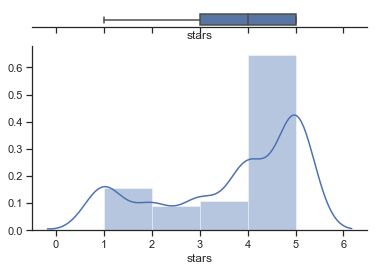

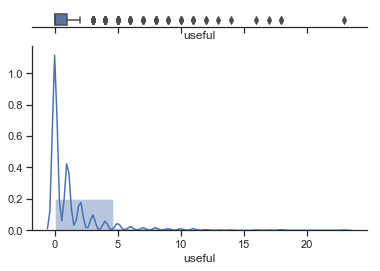

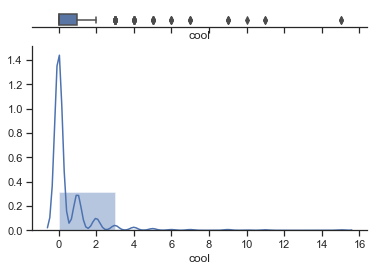

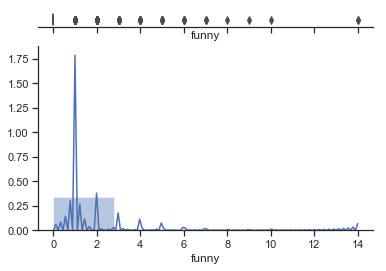

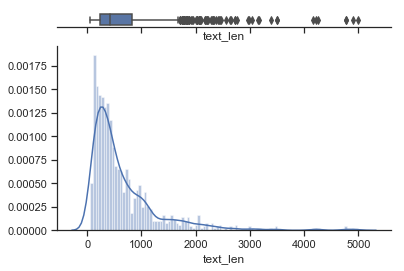

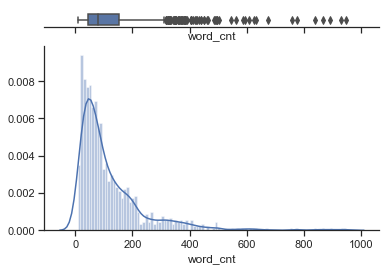

In [4]:
hist_box(df.stars,4)
hist_box(df.useful,5)
hist_box(df.cool,5)
hist_box(df.funny,5)
hist_box(df.text_len,100)
hist_box(df.word_cnt,100)

### basic histograms

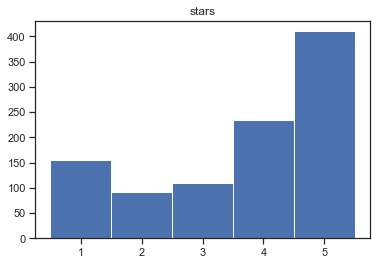

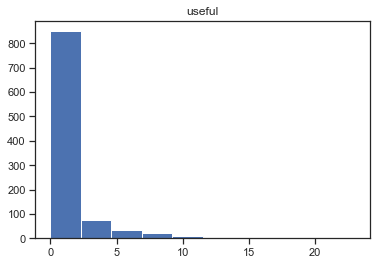

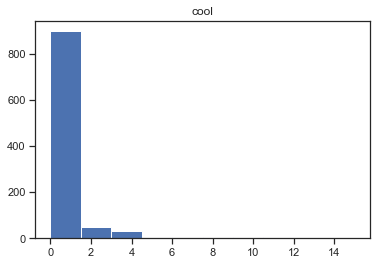

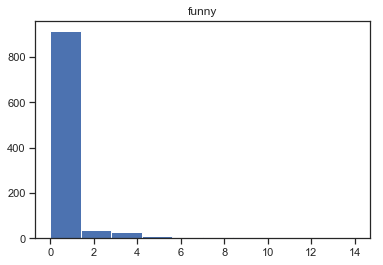

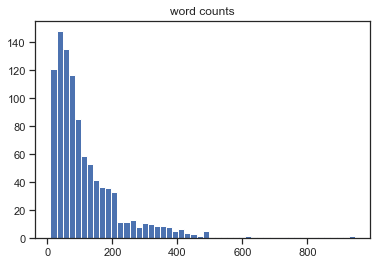

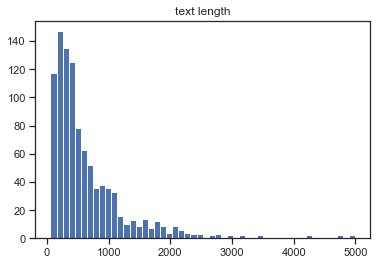

In [8]:
plt.hist(df.stars,range=(0.5, 5.5), bins=5) ; plt.title('stars')       ; plt.show()
plt.hist(df.useful,   bins=10) ; plt.title('useful')      ; plt.show()
plt.hist(df.cool,     bins=10) ; plt.title('cool')        ; plt.show()
plt.hist(df.funny,    bins=10) ; plt.title('funny')       ; plt.show()
plt.hist(df.word_cnt, bins=50) ; plt.title('word counts') ; plt.show()
plt.hist(df.text_len, bins=50) ; plt.title('text length') ; plt.show()

# Correlation Analysis

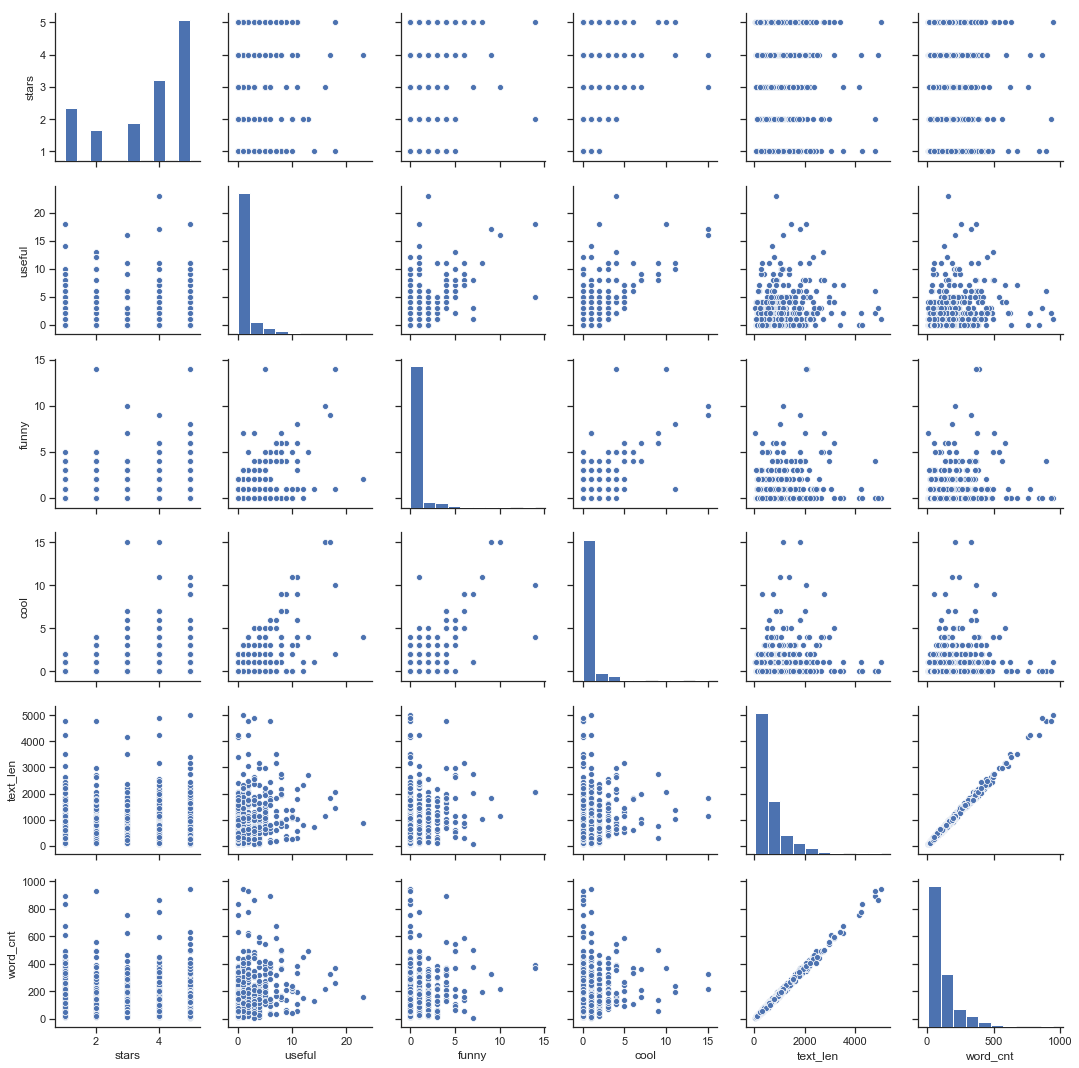

In [6]:
import seaborn as sns
sns.pairplot(df)
plt.show()

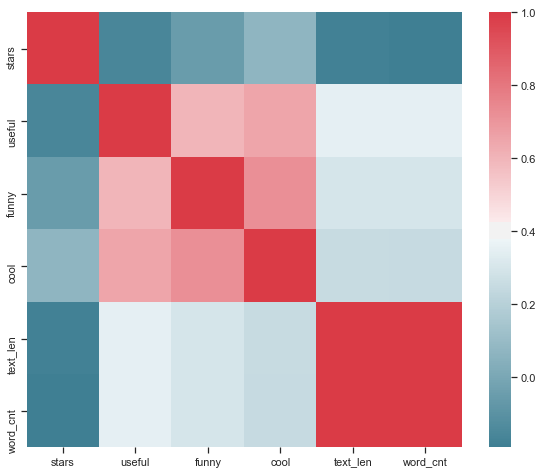

In [7]:
f, ax = plt.subplots(figsize=(10, 8))
corr = df.corr()
sns.heatmap(corr, 
            mask=np.zeros_like(corr, dtype=np.bool), 
            cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, 
            ax=ax)
plt.show()